## Bank Loan Approval Classification


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how theCandidate Loan Approvale Loan Statuss) is affected by other variables such as Gender,Incomey,Age,lEeducation,Credit Score, Home Ownershiph an Loan Intente.


### 2) Data Collection
- Dataset Sourhttps://www.kaggle.com/datasets/taweilo/loan-approval-classification-data74977
- The data consis14s of 8 colum45 and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [40]:
df=pd.read_csv("data\loan_data.csv")

#### Show Top 5 Records

In [41]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


#### Shape of the dataset

In [42]:
df.shape

(45000, 14)

### 2.2 Dataset information

- Age
- gender : sex of students  -> (Male/female)
- Education -> (bachelor's degree,some college,master's degree,associate's degree,high school)
- Income
- Experience
- Home Ownership
- Loan Amount
- Loan Intent
- Loan Interest Rate
- Loan Percent Income
- Person Cred Histoy length
- Credit Score
- Previous Loan Default
- Loan Approval Status

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check unique values
- Check statistics of dataset
- Check various categories present in the different categorical column column

### 3.1 Check Missing values

In [43]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [44]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### 3.4 Checking the number of unique values of each column

In [47]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

### 3.5 Check statistics of data set

In [48]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


#### Insight
- From above description of numerical data: Age mean is 27.7 and Experience mean is 5.4 and Credit Score mean is 632.6;
- Standard deviations: Standard Deviation is almost same for Age and Experience and Credit Score standard deviation is 50.4;
- While minimum age is 20 years and Maximum age 144 years and Minimum experience is 0 years and maximum experience is 125 years:
- So from Maximum Age and Experience we clearly noticed that outlier present in our data set

### Check Categorical and Numerical Data present in Dataset

In [49]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

We have 5 categorical features : ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [51]:
df.head(2)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0


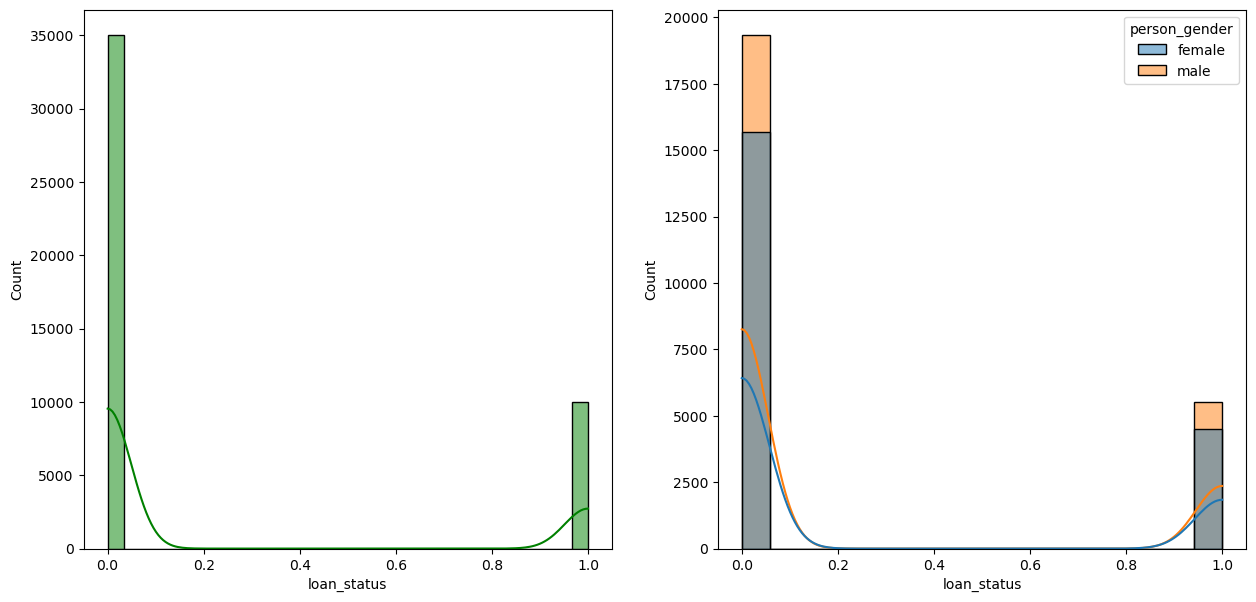

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='loan_status',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='loan_status',kde=True,hue='person_gender')
plt.show()

Age Distribution of People

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


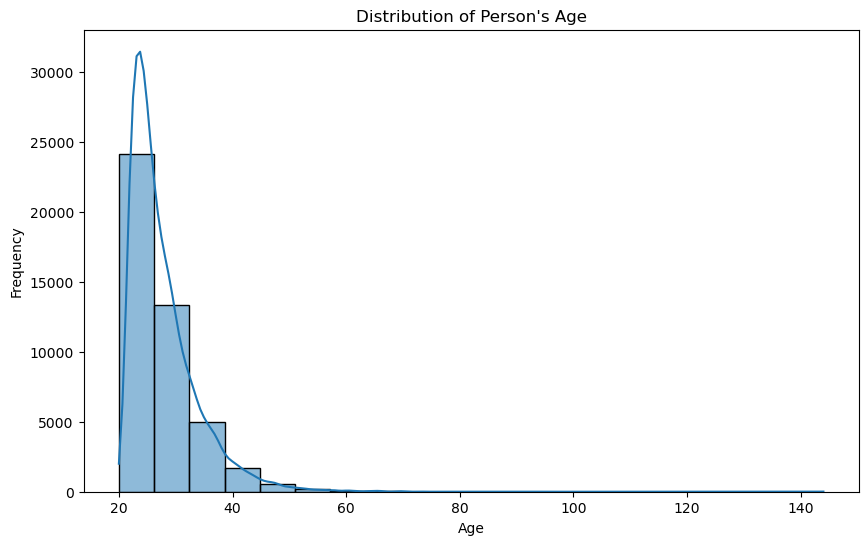

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['person_age'], bins=20, kde=True)
plt.title("Distribution of Person's Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Loan Amount by Loan Intent

C:\Users\HP\AppData\Local\Temp\ipykernel_7336\386844472.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='loan_intent', y='loan_amnt', data=df, estimator='mean', ci=None)


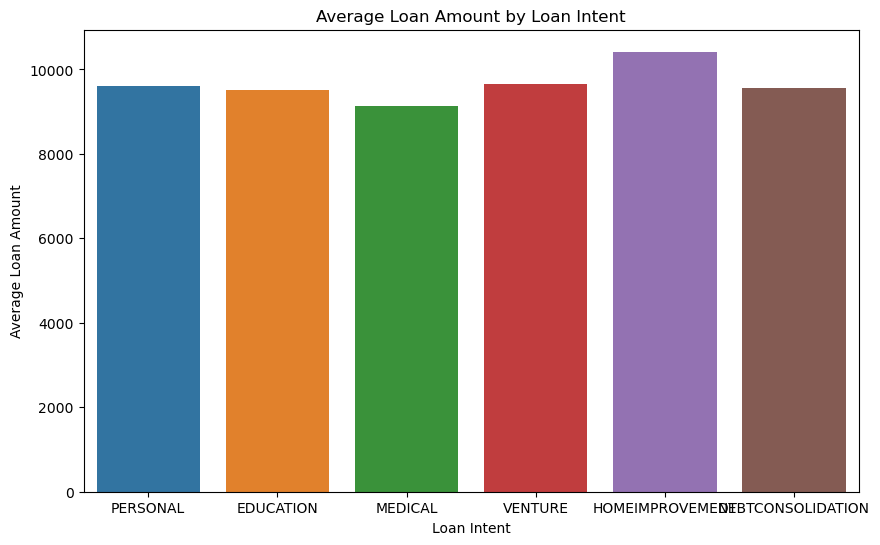

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_intent', y='loan_amnt', data=df, estimator='mean', ci=None)
plt.title("Average Loan Amount by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Average Loan Amount")
plt.show()

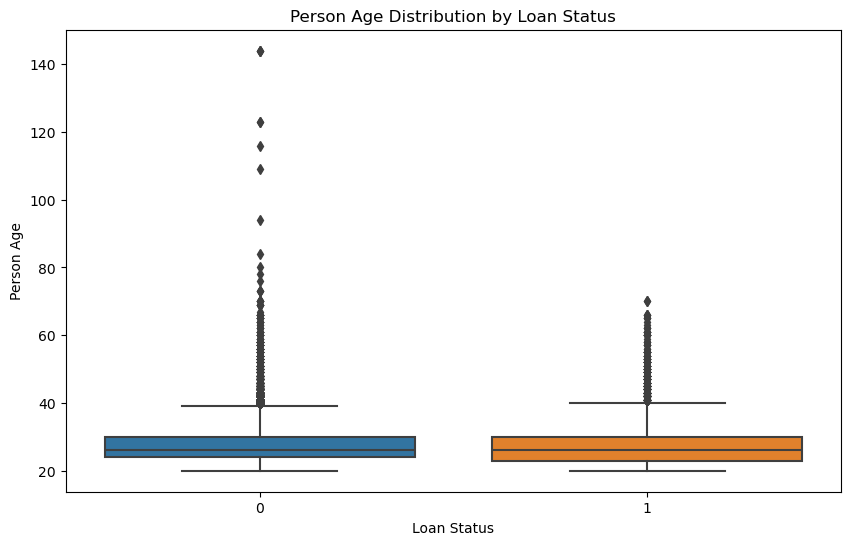

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_age', data=df)
plt.title("Person Age Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Person Age")
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

#Fit Label_Encoder to the categorical column
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['person_gender'])
df['education_encoded'] = label_encoder.fit_transform(df['person_education'])
df['home_own_encoded'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent_encoded'] = label_encoder.fit_transform(df['loan_intent'])
df['previous_loan_default_encoded'] = label_encoder.fit_transform(df['previous_loan_defaults_on_file'])

In [32]:
#Drop encoded column/features
df=df.drop(['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'],axis=1)

In [33]:
import numpy as np
import pandas as pd

def remove_outliers(df):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_cleaned = df.copy()

    for column in df_cleaned[['person_age','person_emp_exp']]:
        if pd.api.types.is_numeric_dtype(df_cleaned[column]):  # Only process numeric columns
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = np.percentile(df_cleaned[column].dropna(), 25)
            Q3 = np.percentile(df_cleaned[column].dropna(), 75)
            IQR = Q3 - Q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Remove outliers by keeping only values within the bounds
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

#df = pd.DataFrame(data)
df_no_outliers = remove_outliers(df)

print("Original DataFrame:\n", df)
print("\nDataFrame after removing outliers:\n", df_no_outliers)


Original DataFrame:
        person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred

In [36]:
df_no_outliers.corr()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,gender_encoded,education_encoded,home_own_encoded,loan_intent_encoded,previous_loan_default_encoded
person_age,1.000000,0.148673,0.904397,0.058192,0.012609,-0.042610,0.821277,0.128730,-0.027403,-0.004695,-0.024363,-0.050497,0.027310,-0.008571
person_income,0.148673,1.000000,0.132624,0.352509,-0.002425,-0.311808,0.115979,0.023743,-0.192512,0.007249,-0.003250,-0.303056,-0.002290,0.097431
person_emp_exp,0.904397,0.132624,1.000000,0.048353,0.016047,-0.038146,0.749499,0.140470,-0.025172,-0.009088,-0.020433,-0.045371,0.025632,-0.013315
loan_amnt,0.058192,0.352509,0.048353,1.000000,0.145063,0.595159,0.043636,0.009735,0.103445,0.011147,-0.004593,-0.149374,0.000222,-0.058041
loan_int_rate,0.012609,-0.002425,0.016047,0.145063,1.000000,0.125847,0.017339,0.011821,0.330430,0.001081,0.003010,0.132648,-0.004638,-0.182110
loan_percent_income,-0.042610,-0.311808,-0.038146,0.595159,0.125847,1.000000,-0.024947,-0.008470,0.384608,0.000662,-0.008272,0.147843,0.005431,-0.206260
cb_person_cred_hist_length,0.821277,0.115979,0.749499,0.043636,0.017339,-0.024947,1.000000,0.106965,-0.017844,-0.005675,-0.019703,-0.035224,0.025237,-0.009610
credit_score,0.128730,0.023743,0.140470,0.009735,0.011821,-0.008470,0.106965,1.000000,-0.007090,-0.002966,0.013787,-0.006728,0.014332,-0.180193
loan_status,-0.027403,-0.192512,-0.025172,0.103445,0.330430,0.384608,-0.017844,-0.007090,1.000000,0.001109,-0.001160,0.235135,-0.069642,-0.547329
gender_encoded,-0.004695,0.007249,-0.009088,0.011147,0.001081,0.000662,-0.005675,-0.002966,0.001109,1.000000,-0.001177,-0.001156,-0.005066,0.002721
